In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, RandomFlip, RandomRotation
import os
from pathlib import Path



sns.set()
tf.__version__

'2.15.0'

In [52]:
print(os.listdir("C:/Users/Mateusz/Desktop/data/archive/data/extracted_images"))

data_path = Path("C:/Users/Mateusz/Desktop/data/archive/data/extracted_images")
print(f"\n{data_path}")

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '[', ']', '{', '}']

C:\Users\Mateusz\Desktop\data\archive\data\extracted_images


In [53]:
batch_size = 32
img_size = (45, 45)
seed = 68

image_dataset = image_dataset_from_directory(
    data_path,
    batch_size = batch_size,
    image_size = img_size,
    seed = seed,
    color_mode= "grayscale",
    validation_split = 0.2,
    subset = "training"
)

Found 375974 files belonging to 82 classes.
Using 300780 files for training.


A tf.data.Dataset object.

    - If label_mode is None, it yields float32 tensors of shape (batch_size, image_size[0], image_size[1], num_channels), encoding images (see below for rules regarding num_channels).
    - Otherwise, it yields a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels), and labels follows the format described below.

Rules regarding labels format:

    - if label_mode is "int", the labels are an int32 tensor of shape (batch_size,).
    - if label_mode is "binary", the labels are a float32 tensor of 1s and 0s of shape (batch_size, 1).
    - if label_mode is "categorical", the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.

Rules regarding number of channels in the yielded images:

    - if color_mode is "grayscale", there's 1 channel in the image tensors.
    - if color_mode is "rgb", there are 3 channels in the image tensors.
    - if color_mode is "rgba", there are 4 channels in the image tensors.


In [54]:
class_names = image_dataset.class_names
print(f"Class names: {class_names}")

Class names: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']


In [55]:
len(image_dataset)

9400

In [56]:
for images, labels in image_dataset.take(1):
    print(labels[0])
    print(images[0])
    print("\n")
    print(labels[1])
    print(images[0])

tf.Tensor(27, shape=(), dtype=int32)
tf.Tensor(
[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]], shape=(45, 45, 1), dtype=float32)


tf.Tensor(39, shape=(), dtype=int32)
tf.Tensor(
[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]], shape=(45, 45, 1), dtype=float32)


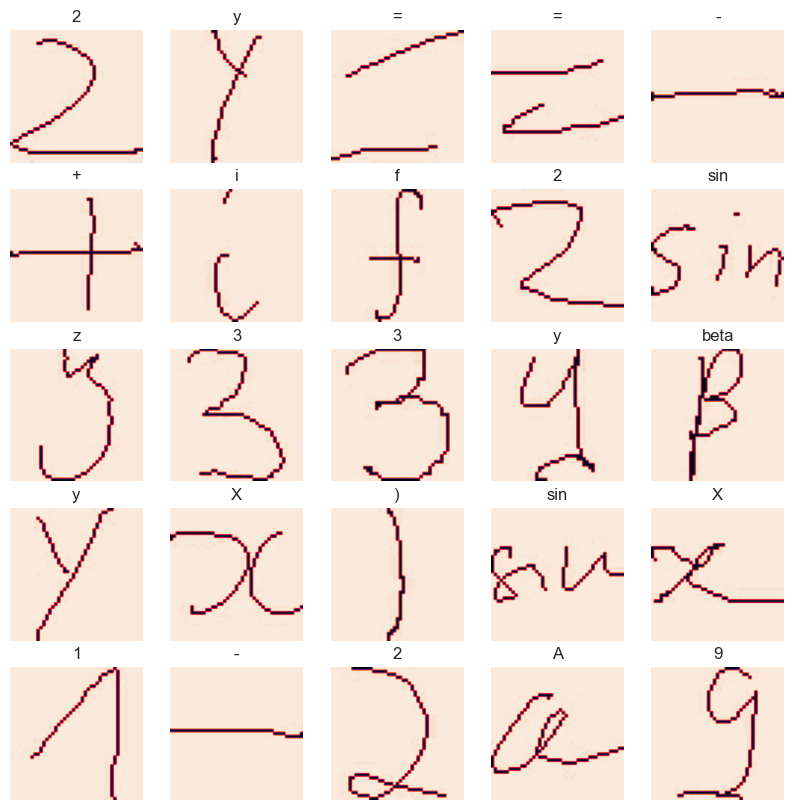

In [57]:
for images, labels in image_dataset.take(1): # take(1) - first batch of elements from dataset
    plt.figure(figsize=(10, 10)) # 10x10 inches plots
    for i in range(25):
        plt.subplot(5, 5, i + 1) # '5 x 5' grid of 'i + 1' (0-24) images 
        plt.imshow(images[i].numpy().astype("uint8"))  # converts image 'i' into a numpy array and converts it to 'uint8' for matplotlib compatibility reasons
        plt.title(image_dataset.class_names[labels[i]])  # gets the correct label for each image
        plt.axis("off")
    plt.show()

In [58]:
len(image_dataset)

9400

In [59]:
data_augmentation_layers = [ # Introduces some sample diversity to help expose the model to different aspects of the training data
    RandomFlip("horizontal"),
    RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

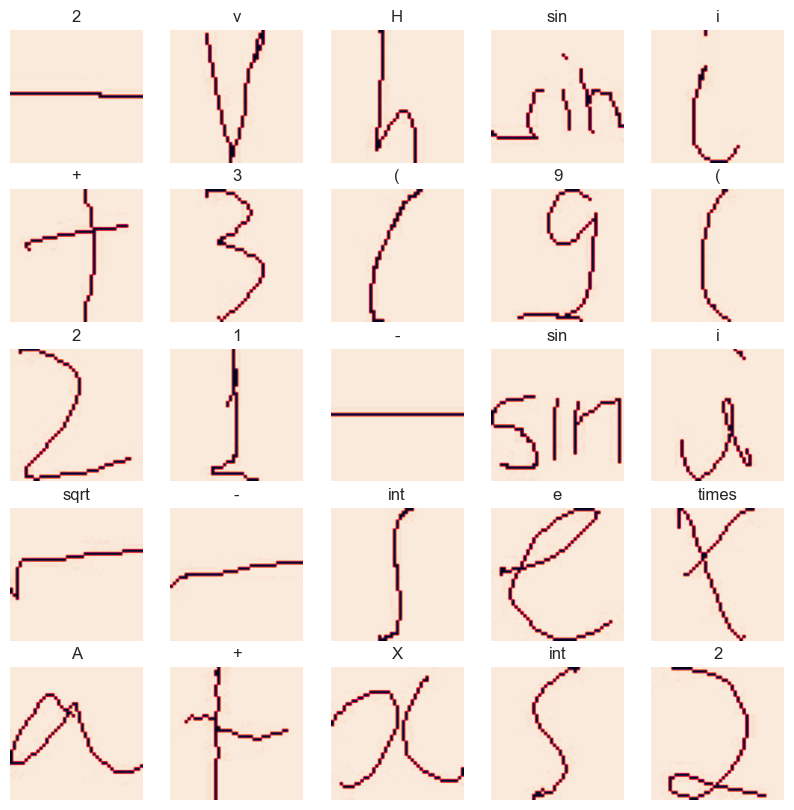

In [60]:
for images, labels in image_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        augmented_images = data_augmentation(images)
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(image_dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [69]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(82, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 82)             │         5,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,842 (1022.82 KB)

 Trainable params: 261,842 (1022.82 KB)

 Non-trainable params: 0 (0.00 B)

1. Is there an object in the input image?
    Yes: Go to 2
    No: Stop (No object detected)


2. Apply first convolutional layer (Conv2D) with 30 filters (5x5) and ReLU activation.
    2.1. Apply MaxPooling2D (2x2) to reduce spatial dimensions.
    2.2. Is there any significant feature detected?
        - Yes: Go to 3
        - No: Stop (No significant features detected)


3. Apply second convolutional layer (Conv2D) with 15 filters (3x3) and ReLU activation.
    3.1. Apply MaxPooling2D (2x2) to further reduce spatial dimensions.
    3.2. Introduce Dropout with a probability of 20% for regularization.
    3.3. Flatten the output.
    3.4. Proceed to the fully connected layers.


4. Apply Dense layer with 128 units and ReLU activation.
    4.1. Are there significant features detected in this layer?
        - Yes: Go to 5
        - No: Stop (No significant features detected)


5. Apply Dense layer with 50 units and ReLU activation.
    5.1. Are there significant features detected in this layer?
        - Yes: Go to 6
        - No: Stop (No significant features detected)


6. Apply Dense layer with 13 units and Softmax activation to get class probabilities.
    6.1. Output the class probabilities.

In [70]:
model.fit(image_dataset, epochs=10, batch_size=200, shuffle=True, verbose=1)

Epoch 1/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 98s 10ms/step - accuracy: 0.7152 - loss: 1.2442
Epoch 2/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 91s 10ms/step - accuracy: 0.9167 - loss: 0.2779
Epoch 3/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0.9382 - loss: 0.1988
Epoch 4/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 91s 10ms/step - accuracy: 0.9492 - loss: 0.1613
Epoch 5/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - accuracy: 0.9542 - loss: 0.1457
Epoch 6/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - accuracy: 0.9592 - loss: 0.1283
Epoch 7/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 93s 10ms/step - accuracy: 0.9644 - loss: 0.1135
Epoch 8/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 94s 10ms/step - accuracy: 0.9664 - loss: 0.1072
Epoch 9/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 96s 10ms/step - accuracy: 0.9666 - loss: 0.1108
Epoch 10/10
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - accuracy: 0.9699 - loss: 0.0999


In [71]:
validation_dataset = image_dataset_from_directory(
    data_path,
    batch_size=batch_size,
    image_size=img_size,
    seed=seed,
    color_mode="grayscale",
    validation_split=0.2,
    subset="validation"
)

validation_loss, validation_accuracy = model.evaluate(validation_dataset)
print(f'Validation Accuracy: {validation_accuracy}')

Found 375974 files belonging to 82 classes.
Using 75194 files for validation.
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9679 - loss: 0.1087
Validation Accuracy: 0.967523992061615


In [72]:
test_loss, test_acc = model.evaluate(validation_dataset, verbose=0)
print(test_acc)

0.967523992061615


In [81]:
predictions = model.predict(image_dataset)
predictions

9400/9400 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step


array([[0.00000000e+00, 6.08134588e-29, 2.11212067e-22, ...,
        1.44143544e-10, 2.31457233e-32, 1.52105007e-27],
       [5.89742014e-14, 1.60260516e-09, 3.59165215e-21, ...,
        7.63079872e-17, 1.15474540e-23, 8.40946846e-14],
       [1.36678386e-11, 9.22212653e-11, 9.49037611e-01, ...,
        5.58226120e-14, 5.53924528e-13, 2.44102383e-09],
       ...,
       [0.00000000e+00, 2.76614192e-28, 4.50888360e-24, ...,
        1.74910312e-11, 3.80477216e-34, 7.41925511e-29],
       [0.00000000e+00, 7.54529639e-29, 7.02682782e-27, ...,
        1.51718940e-21, 1.75301550e-36, 4.51223945e-31],
       [0.00000000e+00, 0.00000000e+00, 2.41557875e-38, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [90]:
model.save("equation_solver_model.keras")